## Observations and Insights 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
combined_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the DataFrame.
mice_count = len(combined_study_df["Mouse ID"].unique())
mice_count

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = combined_study_df.loc[combined_study_df[["Mouse ID", "Timepoint"]].duplicated()]
dup_data["Mouse ID"].unique()

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dups = combined_study_df.loc[combined_study_df["Mouse ID"] == "g989"]
all_dups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_study_df[combined_study_df["Mouse ID"] != "g989"]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
fresh_count = len(clean_data["Mouse ID"].unique())
fresh_count

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

grouped_regimen = clean_data.groupby(["Drug Regimen"])
grouped_regimen 

#Create variable to capture the summary table
tumor_volume = grouped_regimen["Tumor Volume (mm3)"].sum()

tumor_mean = grouped_regimen["Tumor Volume (mm3)"].mean()

tumor_median = grouped_regimen["Tumor Volume (mm3)"].median()

tumor_variance = grouped_regimen["Tumor Volume (mm3)"].var()

tumor_std = grouped_regimen["Tumor Volume (mm3)"].std()

tumor_SEM = grouped_regimen["Tumor Volume (mm3)"].sem()

#Generate Table
summary_stats = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                              "Median Tumor volume" : tumor_median,
                              "Tumor Volume Variance" : tumor_variance,
                              "Tumor Volume Std. Dev" : tumor_std,
                              "Tumor Volume Std Err." : tumor_SEM})
                               
summary_stats       

,Mean Tumor Volume,Median Tumor volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

grouped_regimen = clean_data.groupby(["Drug Regimen"])
grouped_regimen 

#Create variable to capture the summary table
tumor_volume = grouped_regimen["Tumor Volume (mm3)"].sum()

tumor_mean = grouped_regimen["Tumor Volume (mm3)"].mean()

tumor_median = grouped_regimen["Tumor Volume (mm3)"].median()

tumor_variance = grouped_regimen["Tumor Volume (mm3)"].var()

tumor_std = grouped_regimen["Tumor Volume (mm3)"].std()

tumor_SEM = grouped_regimen["Tumor Volume (mm3)"].sem()

#Generate Table
summary_stats = pd.DataFrame({"Mean": tumor_mean,
                              "Median" : tumor_median,
                              "Variance" : tumor_variance,
                              "Std." : tumor_std,
                              "Err." : tumor_SEM})
                               
summary_stats       

,Mean,Median,Variance,Std.,Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

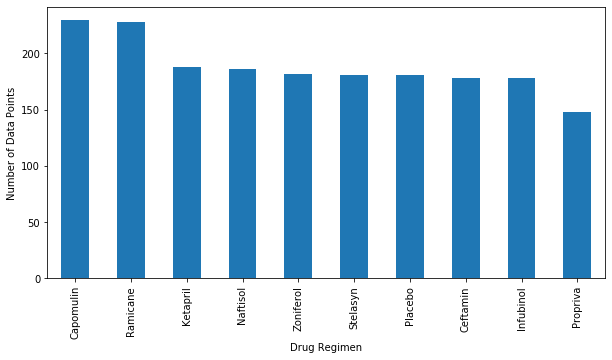

In [72]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
Mice_Per_Treatment = clean_data["Drug Regimen"].value_counts()
Mice_Per_Treatment

Mice_Per_Treatment.plot(kind="bar", figsize=(10,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()




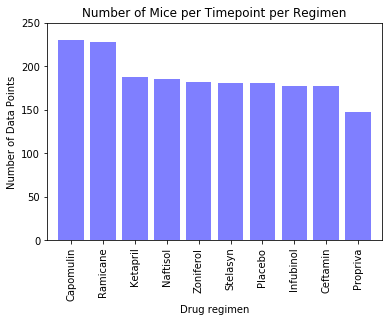

In [75]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#Create an array that contains the number of mice
data_points =[230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
x_axis = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"] 

plt.bar(x_axis, data_points, color='b', alpha=0.5)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data_points)+20)

# Give our chart some labels and adjustments           
plt.title("Number of Mice per Timepoint per Regimen")
plt.xlabel("Drug regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation="vertical")
plt.show()


## Pie Plots

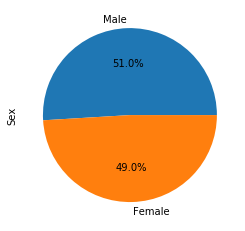

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts = clean_data["Sex"].value_counts()
gender_counts.plot(kind="pie", autopct='%1.1f%%')
plt.show()

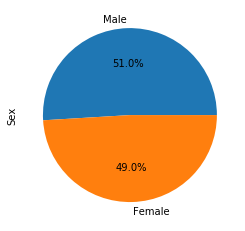

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
max_tumor = clean_data.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()

merged_data = max_tumor[['Mouse ID', "Timepoint"]].merge(clean_data, on=['Mouse ID', 'Timepoint'], how="left")

capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]


In [49]:
# calculate quartiles for each druf
#cap
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upped_bound = cap_upperq + (1.5*cap_iqr)

#ram
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*cap_iqr)
ram_upped_bound = ram_upperq + (1.5*cap_iqr)

#infu
infu_quartiles = infubinol.quantile([.25,.5,.75])
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq - infu_lowerq
infu_lower_bound = infu_lowerq - (1.5*cap_iqr)
infu_upped_bound = infu_upperq + (1.5*cap_iqr)

#ceft
ceft_quartiles = ceftamin.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq - ceft_lowerq
ceft_lower_bound = ceft_lowerq - (1.5*cap_iqr)
ceft_upped_bound = ceft_upperq + (1.5*cap_iqr)


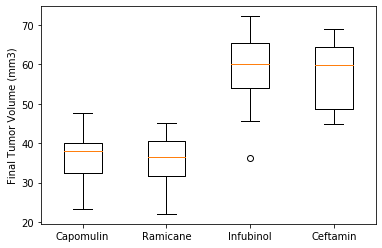

In [55]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]) 
plt.ylabel("Final Tumor Volume (mm3)") 
plt.show()



## Line and Scatter Plots

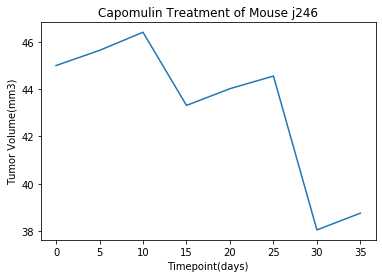

In [58]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_table.loc[capomulin_table["Mouse ID"] == 'j246']
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse j246")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume(mm3)")
plt.show()

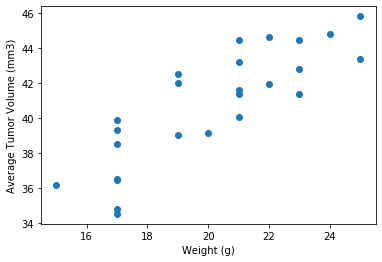

In [59]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


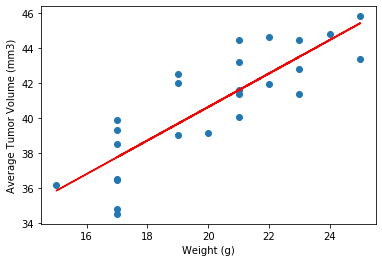

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]

plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()